<a href="https://colab.research.google.com/github/FadQode/Scil-try1/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler

# Persiapan dan Evaluasi Data

## Mengecek Null Data, Duplikasi, dan Outlier

In [3]:
# masukkan data dan jadikan sebuah dataframe object dengan pandas
cancer = pd.read_csv('/content/sample_data/uci-breast-cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Mengevaluasi dataset 1: mengecek nilai null dalam dataset
cancer.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
print("Data duplicated: ", cancer.duplicated().sum())

Data duplicated:  0


In [6]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
cancer.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [8]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Eksplorasi dan Pra-Pemrosesan Data

## Mengevaluasi dan Menyaring Feature yang akan digunakan

### Menggunakan Correlation Method milik pandas

In [9]:
#Sorting feature dengan korelasi tertinggi dengan diagnosis
cancer['diagnosis'] = cancer['diagnosis'].replace({'M': 1, 'B': 0})
corr_matrix = cancer.corr()

target_corr = corr_matrix['diagnosis'].sort_values(ascending=False)
print(target_corr)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

<ipython-input-9-f32718102c9d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer['diagnosis'] = cancer['diagnosis'].replace({'M': 1, 'B': 0})


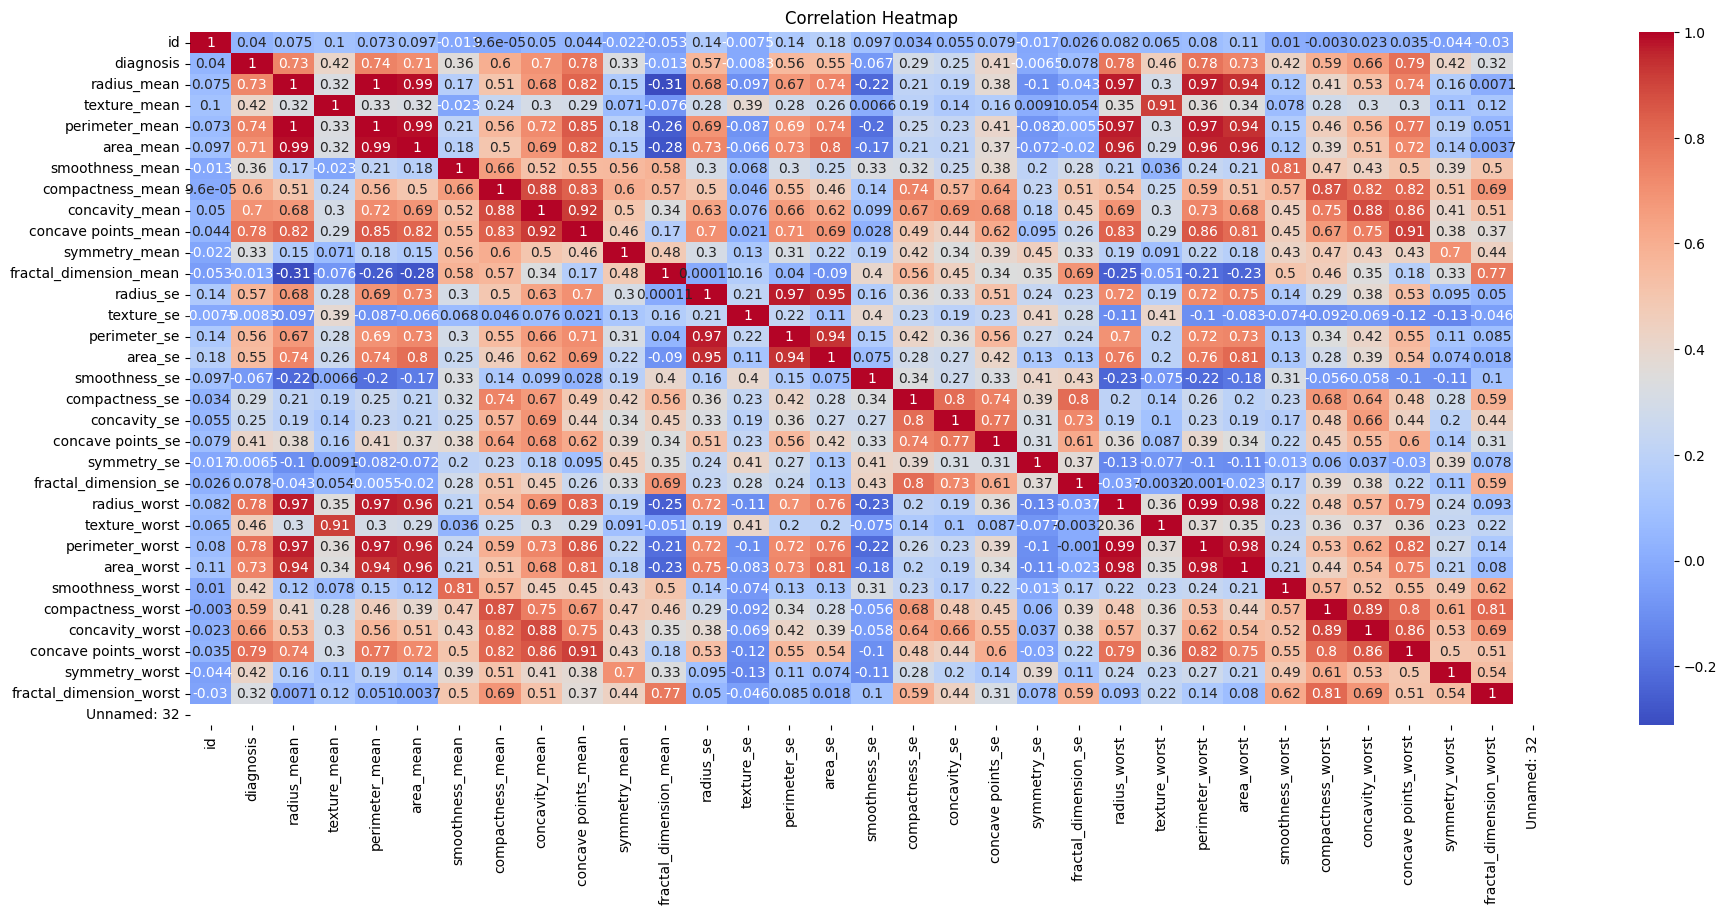

In [10]:
# Visualisasi Korelasi satu feature dengan feature yang lain
plt.figure(figsize=(22, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
selected_features_corr = target_corr[(target_corr >= 0.7)]
print(selected_features_corr)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
Name: diagnosis, dtype: float64


In [12]:
selected_features_corr_ls = selected_features_corr.index.tolist()
print(selected_features_corr_ls)
cancer_corr = pd.DataFrame(cancer[selected_features_corr_ls])
cancer_corr.describe()

['diagnosis', 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean']


,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,14.127292,654.889104
std,0.483918,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,3.524049,351.914129
min,0.000000,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,143.500000
25%,0.000000,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,11.700000,420.300000
50%,0.000000,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,13.370000,551.100000
75%,1.000000,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,15.780000,782.700000
max,1.000000,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,2501.000000


### Pemrosesan Feature yang didapat dari korelasi

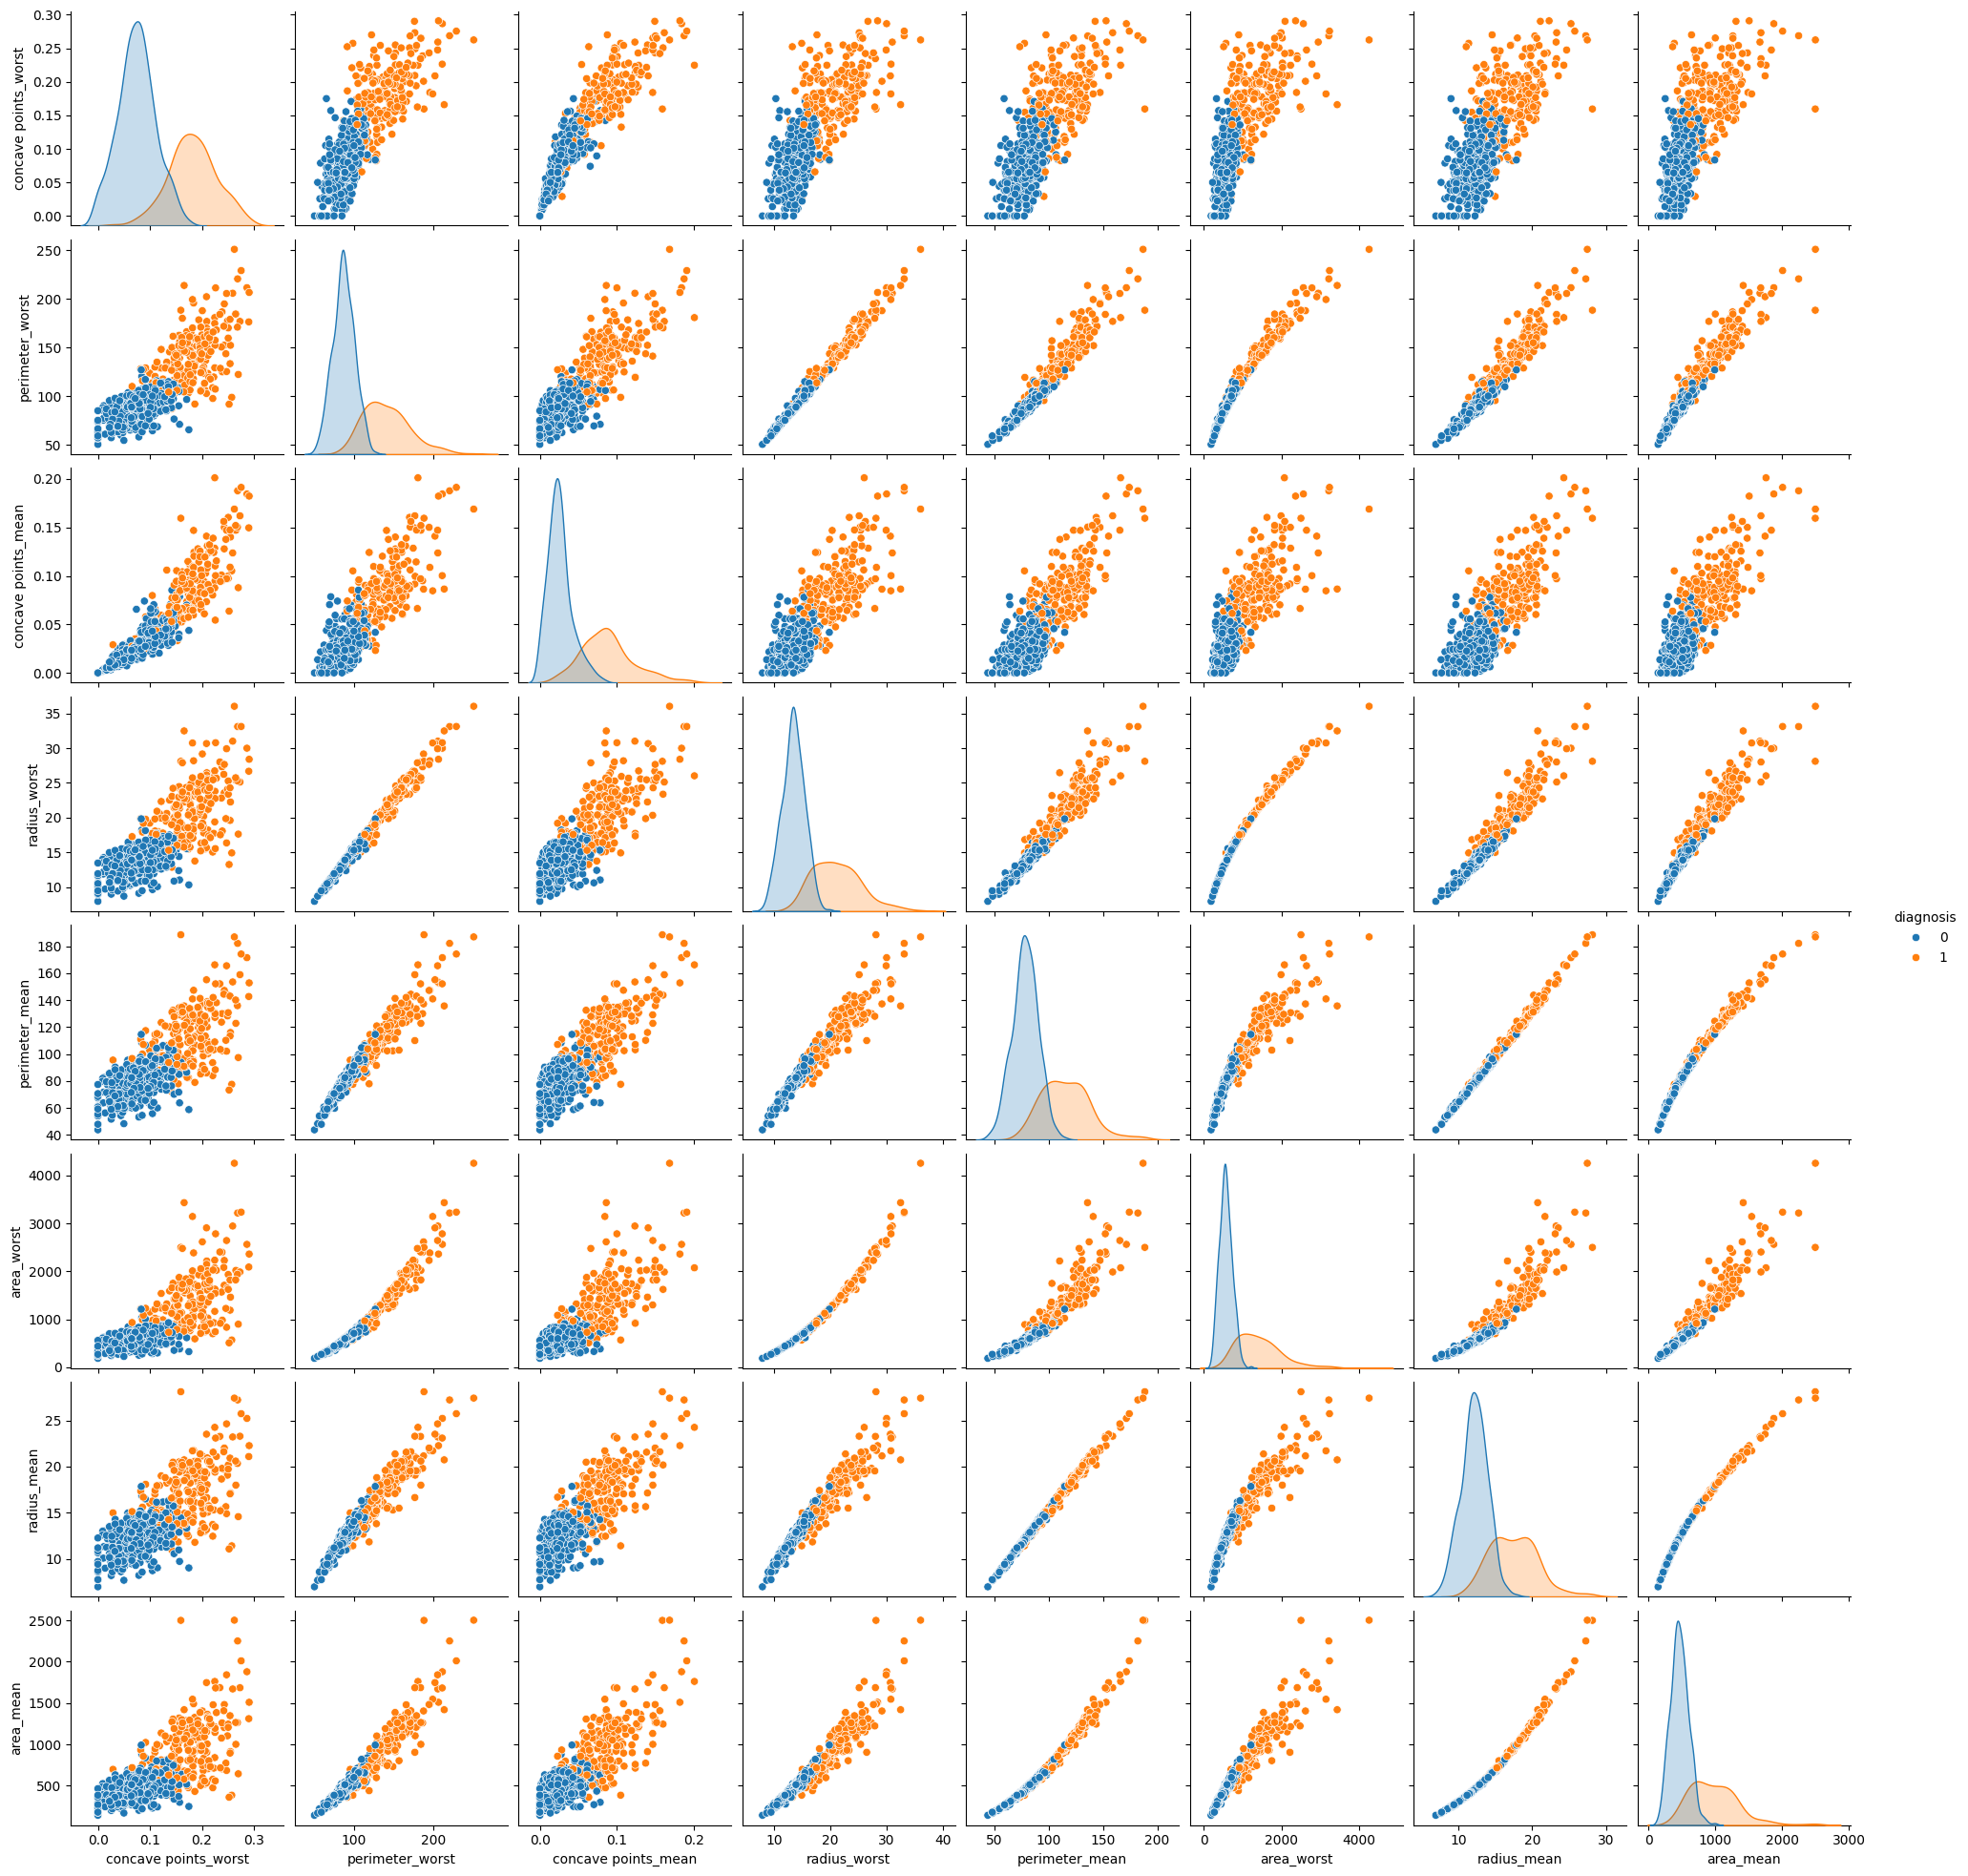

In [13]:
sns.pairplot(cancer_corr, hue='diagnosis')

## Preprocessing, Normalize, dan Split

In [14]:
TRAIN = 0.8
TEST = 1 - TRAIN

In [15]:
x_corr = cancer_corr.drop(columns=['diagnosis'])
y_corr = cancer_corr['diagnosis']

x_train_corr, x_test_corr, y_train_corr, y_test_corr = train_test_split(x_corr, y_corr, test_size=TEST, random_state=42)
scaler = RobustScaler()
X_train_scaled_corr = scaler.fit_transform(x_train_corr)
X_test_scaled_corr = scaler.transform(x_test_corr)


In [16]:
x = cancer.drop(columns=['diagnosis', 'Unnamed: 32'])
y = cancer['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST, random_state=42)

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


# Implementasi Model Pembelajaran Mesin

## Training Model Menggunakan Logistic Regression

### Training Model Menggunakan beberapa Feature dengan relevansi tertinggi dari Correlation

In [17]:

model_corr_LR = LogisticRegression(max_iter=1000, solver='lbfgs')
model_corr_LR.fit(X_train_scaled_corr, y_train_corr)


LogisticRegression(max_iter=1000)

Correct: 111
Incorrect: 3
Test Accuracy: 0.97
Train Accuracy: 0.96
F1-Score: 0.97


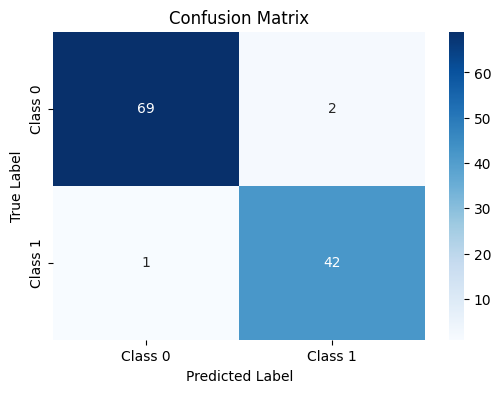

In [18]:
y_pred_test_corr_LR = model_corr_LR.predict(X_test_scaled_corr)
y_pred_train_corr_LR = model_corr_LR.predict(X_train_scaled_corr)

correct_corr_LR = sum(y_pred_test_corr_LR == y_test_corr)
incorrect_corr_LR = len(y_test_corr) - correct_corr_LR
test_accuracy_corr_LR = accuracy_score(y_test_corr, y_pred_test_corr_LR)
train_accuracy_corr_LR = accuracy_score(y_train_corr, y_pred_train_corr_LR)
f1_corr_LR = metrics.f1_score(y_test_corr, y_pred_test_corr_LR, average='binary')
cm_corr_LR = confusion_matrix(y_test_corr, y_pred_test_corr_LR)

print(f"Correct: {correct_corr_LR}")
print(f"Incorrect: {incorrect_corr_LR}")
print(f"Test Accuracy: {test_accuracy_corr_LR:.2f}")
print(f"Train Accuracy: {train_accuracy_corr_LR:.2f}")
print(f"F1-Score: {f1_corr_LR:.2f}")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_corr_LR, display_labels = model_corr_LR.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_corr_LR, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Tanpa Pemilihan Feature

In [19]:
model_LR = LogisticRegression(max_iter=1000, solver='lbfgs')
model_LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Correct: 112
Incorrect: 2
Test Accuracy: 0.98
Train Accuracy: 0.99
F1-Score: 0.98


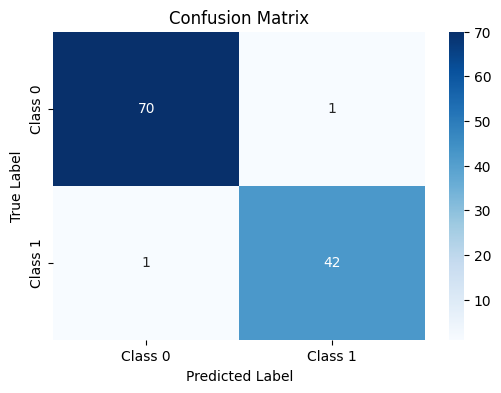

In [20]:
y_pred_test_LR = model_LR.predict(X_test_scaled)
y_pred_train_LR = model_LR.predict(X_train_scaled)

correct_LR = sum(y_pred_test_LR == y_test)
incorrect_LR = len(y_test) - correct_LR
test_accuracy_LR = accuracy_score(y_test, y_pred_test_LR)
train_accuracy_LR = accuracy_score(y_train, y_pred_train_LR)
f1_LR = metrics.f1_score(y_test, y_pred_test_LR, average='binary')
cm_LR = confusion_matrix(y_test, y_pred_test_LR)

print(f"Correct: {correct_LR}")
print(f"Incorrect: {incorrect_LR}")
print(f"Test Accuracy: {test_accuracy_LR:.2f}")
print(f"Train Accuracy: {train_accuracy_LR:.2f}")
print(f"F1-Score: {f1_LR:.2f}")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_LR, display_labels = model_LR.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Training Model dengan menggunakan Algoritma Multi Layer Perceptron

### Menggunakan Feature dari correlation

In [21]:
model_corr_MLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_corr_MLP.fit(X_train_scaled_corr, y_train_corr)

MLPClassifier(max_iter=1000, random_state=42)

Correct: 111
Incorrect: 3
Test Accuracy: 0.97
Train Accuracy: 0.97
F1-Score: 0.97


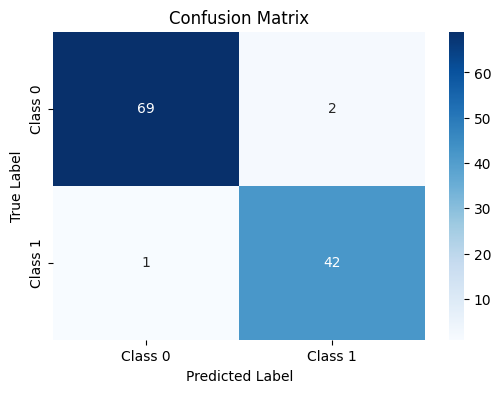

In [22]:
y_pred_test_corr_MLP = model_corr_MLP.predict(X_test_scaled_corr)
y_pred_train_corr_MLP = model_corr_MLP.predict(X_train_scaled_corr)

correct_corr_MLP = sum(y_pred_test_corr_MLP == y_test_corr)
incorrect_corr_MLP = len(y_test_corr) - correct_corr_MLP
test_accuracy_corr_MLP = accuracy_score(y_test_corr, y_pred_test_corr_MLP)
train_accuracy_corr_MLP = accuracy_score(y_train_corr, y_pred_train_corr_MLP)
f1_corr_MLP = metrics.f1_score(y_test_corr, y_pred_test_corr_MLP, average='binary')
cm_corr_MLP = confusion_matrix(y_test_corr, y_pred_test_corr_MLP)

print(f"Correct: {correct_corr_MLP}")
print(f"Incorrect: {incorrect_corr_MLP}")
print(f"Test Accuracy: {test_accuracy_corr_MLP:.2f}")
print(f"Train Accuracy: {train_accuracy_corr_MLP:.2f}")
print(f"F1-Score: {f1_corr_MLP:.2f}")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_corr_MLP, display_labels = model_corr_MLP.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_corr_MLP, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Tanoa Pemilihan Feature

In [23]:
model_MLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_MLP.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=42)

Correct: 111
Incorrect: 3
Test Accuracy: 0.97
Train Accuracy: 1.00
F1-Score: 0.96


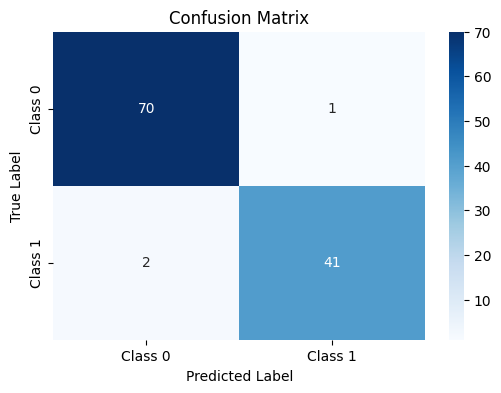

In [24]:
y_pred_test_MLP = model_MLP.predict(X_test_scaled)
y_pred_train_MLP = model_MLP.predict(X_train_scaled)

correct_MLP = sum(y_pred_test_MLP == y_test)
incorrect_MLP = len(y_test) - correct_MLP
test_accuracy_MLP = accuracy_score(y_test, y_pred_test_MLP)
train_accuracy_MLP = accuracy_score(y_train, y_pred_train_MLP)
f1_MLP = metrics.f1_score(y_test, y_pred_test_MLP, average='binary')
cm_MLP = confusion_matrix(y_test, y_pred_test_MLP)

print(f"Correct: {correct_MLP}")
print(f"Incorrect: {incorrect_MLP}")
print(f"Test Accuracy: {test_accuracy_MLP:.2f}")
print(f"Train Accuracy: {train_accuracy_MLP:.2f}")
print(f"F1-Score: {f1_MLP:.2f}")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_MLP, display_labels = model_MLP.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_MLP, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluasi dan Perbandingan Model

In [25]:
metrics_data = {
    "Metric": ["Correct", "Incorrect", "Test Accuracy", "Train Accuracy", "F1-Score"],
    "LR Tanpa Korelasi": [correct_LR, incorrect_LR, f"{test_accuracy_LR:.2f}", f"{train_accuracy_LR:.2f}", f"{f1_LR:.2f}"],
    "MLP Tanpa Korelasi": [correct_MLP, incorrect_MLP, f"{test_accuracy_MLP:.2f}", f"{train_accuracy_MLP:.2f}", f"{f1_MLP:.2f}"],
    "LR dengan Korelasi": [correct_corr_LR, incorrect_corr_LR, f"{test_accuracy_corr_LR:.2f}", f"{train_accuracy_corr_LR:.2f}", f"{f1_corr_LR:.2f}"],
    "MLP dengan Korelasi": [correct_MLP, incorrect_MLP, f"{test_accuracy_MLP:.2f}", f"{train_accuracy_MLP:.2f}", f"{f1_MLP:.2f}"],
}

metrics_df = pd.DataFrame(metrics_data)

print(metrics_df)

           Metric LR Tanpa Korelasi MLP Tanpa Korelasi LR dengan Korelasi  \
0         Correct               112                111                111   
1       Incorrect                 2                  3                  3   
2   Test Accuracy              0.98               0.97               0.97   
3  Train Accuracy              0.99               1.00               0.96   
4        F1-Score              0.98               0.96               0.97   

  MLP dengan Korelasi  
0                 111  
1                   3  
2                0.97  
3                1.00  
4                0.96  


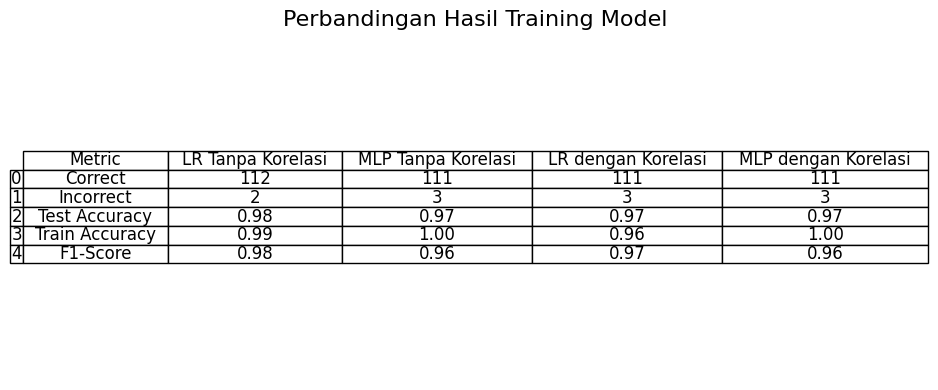

In [28]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=metrics_df.values,
                 colLabels=metrics_df.columns,
                 rowLabels=metrics_df.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(metrics_df.columns))))
plt.title("Perbandingan Hasil Training Model", fontsize=16)
plt.tight_layout()
plt.show()
